In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

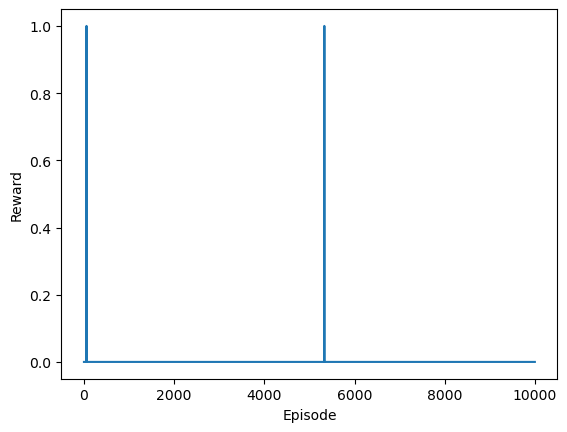

In [3]:
class DoubleQLearning:
    def __init__(self, alpha, gamma, epsilon, actions):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.q1 = {}
        self.q2 = {}
        self.state = None
        self.action = None
        
    def update(self, reward, next_state):
        if random.random() < 0.5:
            self.q1[(self.state, self.action)] = self.q1.get((self.state, self.action), 0) + self.alpha * (reward + self.gamma * self.q2.get((next_state, self._argmax(self.q1, next_state)), 0) - self.q1.get((self.state, self.action), 0))
        else:    
            self.q2[(self.state, self.action)] = self.q2.get((self.state, self.action), 0) + self.alpha * (reward + self.gamma * self.q1.get((next_state, self._argmax(self.q2, next_state)), 0) - self.q2.get((self.state, self.action), 0))
        self.state = next_state
        
    def act(self, state):
        self.state = state
        if random.random() < self.epsilon:
            self.action = random.choice(self.actions)
        else:
            if random.random() < 0.5:
                self.action = self._argmax(self.q1, state)
            else:
                self.action = self._argmax(self.q2, state)
        return self.action
    
    def _argmax(self, d, state):
        best_action = None
        best_value = float('-inf')
        for a in self.actions:
            if (state, a) in d and d[(state, a)] > best_value:
                best_Value = d[(state, a)]
                best_action = a
            if best_action is None:
                return random.choice(self.actions)
            else:
                return best_action

env = gym.make('FrozenLake-v1')

actions = range(env.action_space.n)
agent = DoubleQLearning(alpha = 0.5,
                       gamma = 0.99,
                       epsilon = 0.1,
                       actions = actions)

#Train the agent
num_episodes = 10000
episode_rewards = np.zeros(num_episodes)
for i in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.update(reward, next_state)
        episode_reward += reward
        state = next_state
    episode_rewards[i] = episode_reward
    
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [7]:
## Testing
nul_eval_episodes = 100000
eval_episode_rewards = np.zeros(nul_eval_episodes)
for i in range(nul_eval_episodes):
    state = env.reset()
    done = False
    eval_episode_reward = 0
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        eval_episode_reward += reward
        state = next_state
    eval_episode_rewards[i] = eval_episode_reward
#print avg. reward
print("Average evaluation episode reward: {}".format(np.mean(eval_episode_rewards)))

Average evaluation episode reward: 9e-05
